# 01 — EDA: SINAN Arboviroses (Dengue/Zika/Chikungunya)

**Objetivo:** explorar estatisticamente o dataset público do SINAN (dados abertos), gerar estatísticas descritivas e visualizações iniciais.

- Portal: http://dados.gov.br  
- Dataset (exemplo): Casos de Arboviroses (SINAN) — https://dados.gov.br/dados/conjuntos-dados/arboviroses-dengue  
- Órgão responsável: Ministério da Saúde — SINAN


In [2]:
# Configuração de ambiente e caminhos
import os
import sys
from pathlib import Path

# Ajusta sys.path para importar pacotes da raiz do projeto
project_root = Path().resolve().parent
sys.path.append(str(project_root))

# Libs externas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports do projeto (funciona se src/ estiver acessível)
from src.data.make_dataset import load_raw_data, basic_cleaning
from src.features.build_features import build_feature_matrix
from src.viz.visualize import (
    plot_age_hist, plot_age_boxplot, plot_weekly_cases, plot_symptom_bars,
    plot_corr_heatmap, plot_notification_delay_boxplot
)
from src.utils.helpers import ensure_dirs, save_fig, value_counts_sorted

# Configurações globais
plt.rcParams["figure.dpi"] = 120
sns.set_theme()

# Caminhos de arquivos e pastas
RAW = "data/raw/sinan_arboviroses_2024.csv"
INTERIM = "data/interim/sinan_arboviroses_2024_clean.csv"
PROCESSED = "data/processed/sinan_arboviroses_2024_features.csv"
FIGDIR = "reports/figures"
TBLDIR = "reports/tables"

# Garante que pastas existam
ensure_dirs([os.path.dirname(INTERIM), os.path.dirname(PROCESSED), FIGDIR, TBLDIR])


In [3]:
df_raw = load_raw_data(RAW)
print("Formato bruto:", df_raw.shape)
df = basic_cleaning(df_raw)
print("Formato após limpeza mínima:", df.shape)
df.head()


C:\Users\kaique.santos\OneDrive - Venturus iTriad\Documentos\estudos\ciencia_de_dados\estudo_1\src\data\make_dataset.py:20: DtypeWarning: Columns (22,44,45,46,54,101) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, sep=sep, encoding=encoding)


MemoryError: Unable to allocate 4.51 GiB for an array with shape (94, 6434137) and data type float64

## 2. Descrição do Dataset

- **Nome**: Casos de Arboviroses (SINAN)
- **Link original**: *(adicione aqui o link exato do portal de dados)*  
- **Órgão responsável**: Ministério da Saúde — SINAN  
- **Tema e finalidade**: Vigilância epidemiológica de dengue, zika e chikungunya; suporte a ações de prevenção/controle.
- **Registros e colunas**: Reportados abaixo via código.
- **Variáveis-chave**:
  - `DT_NOTIFIC`: Data da notificação
  - `DT_SIN_PRI`: Data do início dos sintomas
  - `SG_UF_NOT`: UF de notificação
  - `ID_MUNICIP`: Município de notificação
  - `NU_IDADE_N`: Idade
  - `CS_SEXO`: Sexo
  - Sintomas: `FEBRE`, `CEFALEIA`, `MIALGIA`, `EXANTEMA`, etc.
  - `EVOLUCAO`, `HOSPITALIZ`, `CLASSI_FIN`


In [ ]:
print("Nº de registros:", df.shape[0])
print("Nº de colunas:", df.shape[1])

display(df.dtypes.to_frame("dtype").T)

missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)).round(3)
faltantes = pd.DataFrame({"n_missing": missing, "pct_missing": missing_pct})
display(faltantes.head(20))

faltantes.to_csv(f"{TBLDIR}/missing_top20.csv")


Nº de registros: 1410921
Nº de colunas: 122


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W,ATRASO_NOTIF_DIAS
dtype,int64,object,datetime64[ns],int64,int64,int64,int64,float64,float64,datetime64[ns],...,float64,float64,float64,float64,float64,object,float64,float64,float64,int64


,n_missing,pct_missing
FLXRECEBI,1410921,1.000
COMPLICA,1410921,1.000
CON_FHD,1410921,1.000
PLAQ_MENOR,1410921,1.000
EVIDENCIA,1410921,1.000
PLASMATICO,1410921,1.000
HEMATURA,1410921,1.000
SANGRAM,1410921,1.000
PETEQUIAS,1410921,1.000
DOENCA_TRA,1410921,1.000


In [5]:
# Numéricas
desc_num = df.describe().T
display(desc_num)
desc_num.to_csv(f"{TBLDIR}/desc_numeric.csv")

# Moda (numéricas)
mode_num = df.mode(numeric_only=True).head(1).T
mode_num.columns = ["mode"]
display(mode_num)
mode_num.to_csv(f"{TBLDIR}/mode_numeric.csv")

# Categóricas mais frequentes (top 10)
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
topcats = {}
for c in cat_cols:
    vc = value_counts_sorted(df[c], dropna=False).head(10)
    topcats[c] = vc
    vc.to_csv(f"{TBLDIR}/top10_{c}.csv")
print(f"Colunas categóricas analisadas: {len(cat_cols)}")


,count,mean,min,25%,50%,75%,max,std
TP_NOT,1410921.0,2.000001,2.0,2.0,2.0,2.0,3.0,0.001191
DT_NOTIFIC,1410921,2024-04-24 02:55:30.122665216,2023-12-31 00:00:00,2024-03-07 00:00:00,2024-04-12 00:00:00,2024-05-22 00:00:00,2024-12-28 00:00:00,NaN
SEM_NOT,1410921.0,202417.025792,202401.0,202410.0,202415.0,202421.0,202452.0,10.135457
NU_ANO,1410921.0,2023.999879,2023.0,2024.0,2024.0,2024.0,2024.0,0.011008
SG_UF_NOT,1410921.0,35.737406,11.0,31.0,35.0,41.0,53.0,7.52059
...,...,...,...,...,...,...,...,...
NDUPLIC_N,3039.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CS_FLXRET,1410919.0,0.465833,0.0,0.0,0.0,1.0,1.0,0.498831
FLXRECEBI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIGRADO_W,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,mode
TP_NOT,2.0
SEM_NOT,202415.0
NU_ANO,2024.0
SG_UF_NOT,35.0
ID_MUNICIP,355030.0
...,...
NDUPLIC_N,1.0
CS_FLXRET,0.0
FLXRECEBI,NaN
MIGRADO_W,NaN


Colunas categóricas analisadas: 4


In [6]:
if "NU_IDADE_N" in df.columns:
    q1 = df["NU_IDADE_N"].quantile(0.25)
    q3 = df["NU_IDADE_N"].quantile(0.75)
    iqr = q3 - q1
    print({"Q1": q1, "Q3": q3, "IQR": iqr})


{'Q1': np.float64(22.75), 'Q3': np.float64(52.0), 'IQR': np.float64(29.25)}


In [7]:
from src.features.build_features import add_age_bins, binarize_symptoms

df_feat = build_feature_matrix(df)
print("Formato com features:", df_feat.shape)
df_feat.head()


Formato com features: (1410921, 138)


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,NAUSEA_BIN,DOR_COSTAS_BIN,CONJUNTVIT_BIN,ARTRITE_BIN,ARTRALGIA_BIN,PETEQUIA_N_BIN,LEUCOPENIA_BIN,DOR_RETRO_BIN,N_SINTOMAS,SEXO_TXT
0,2,A90,2024-01-24,202404,2024,12,120020,1941.0,6788637.0,2024-01-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Masculino
1,2,A90,2024-01-03,202401,2024,12,120033,1941.0,2000083.0,2024-01-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Masculino
2,2,A90,2024-01-14,202403,2024,12,120033,1941.0,2000083.0,2024-01-12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Masculino
3,2,A90,2024-02-16,202407,2024,12,120042,1941.0,2000016.0,2024-02-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Masculino
4,2,A90,2024-01-16,202403,2024,12,120020,1941.0,5336171.0,2024-01-12,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,Masculino


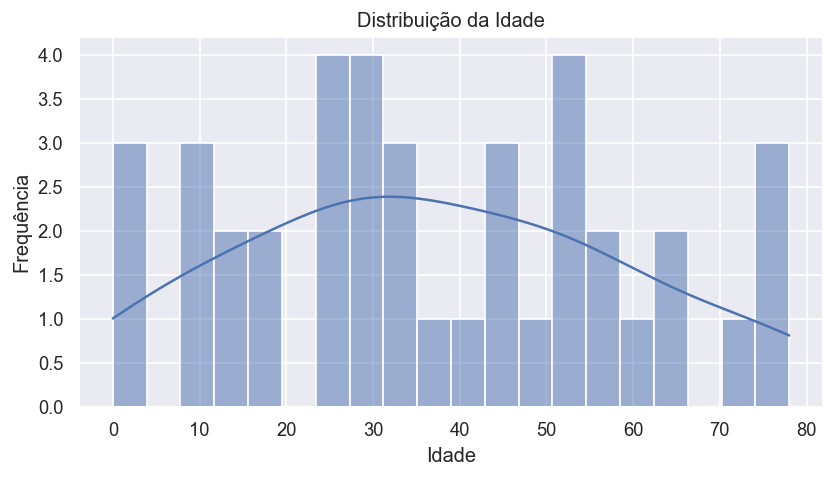

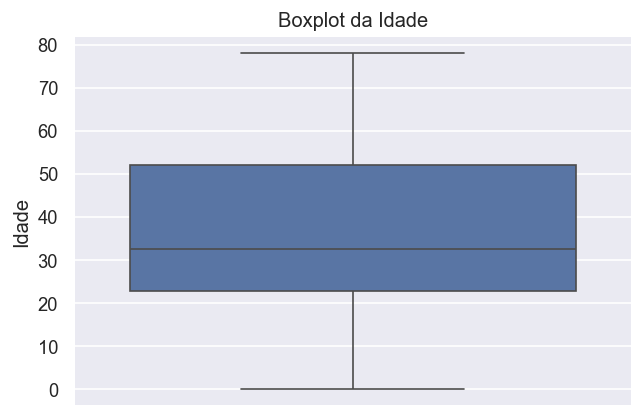

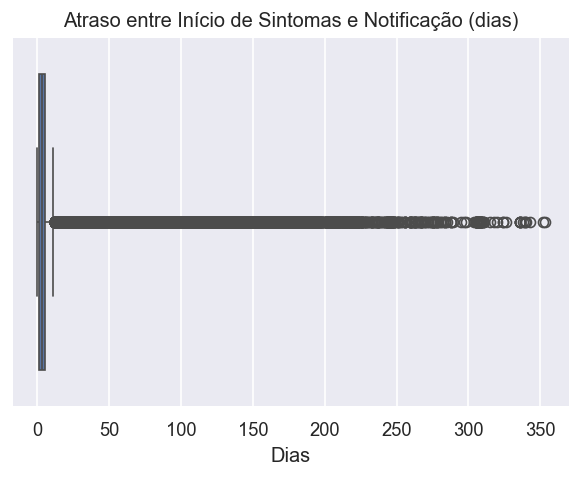

In [8]:
ax = plot_age_hist(df_feat); save_fig(f"{FIGDIR}/idade_hist.png"); plt.show()
ax = plot_age_boxplot(df_feat); save_fig(f"{FIGDIR}/idade_box.png"); plt.show()

if "ATRASO_NOTIF_DIAS" in df_feat.columns:
    ax = plot_notification_delay_boxplot(df_feat); save_fig(f"{FIGDIR}/atraso_notif_box.png"); plt.show()


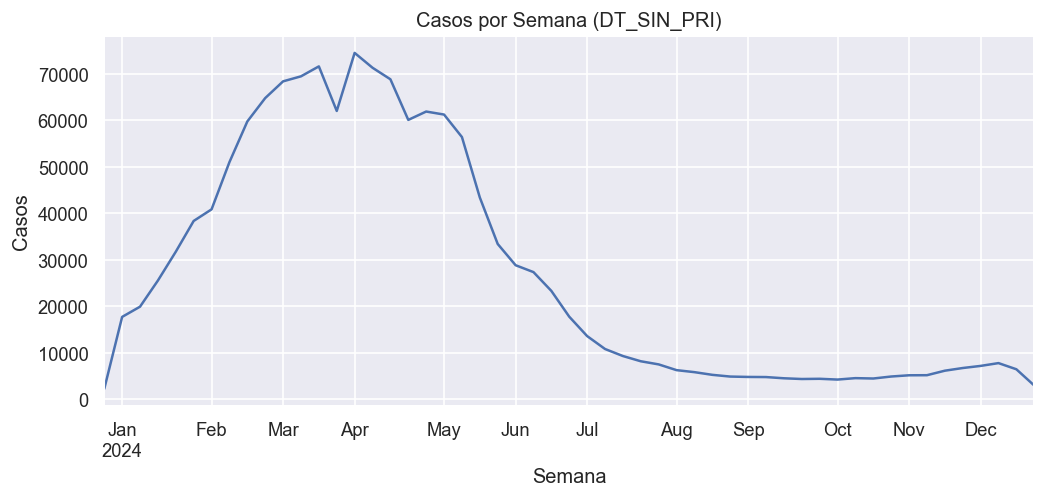

In [9]:
if "DT_SIN_PRI" in df_feat.columns:
    ax = plot_weekly_cases(df_feat); save_fig(f"{FIGDIR}/semana_ts.png"); plt.show()


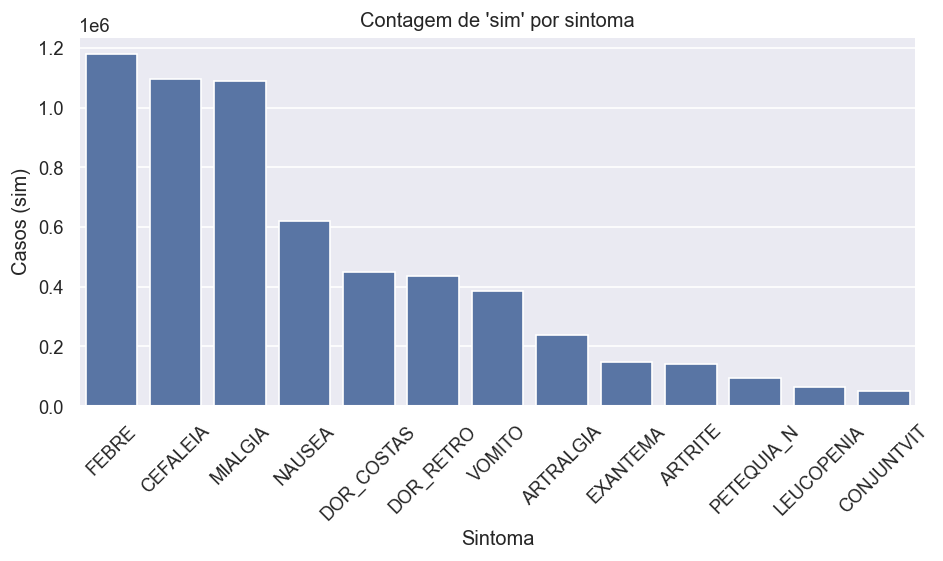

count    1.410921e+06
mean     4.242710e+00
std      2.051545e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      1.300000e+01
Name: N_SINTOMAS, dtype: float64

In [10]:
ax = plot_symptom_bars(df_feat); save_fig(f"{FIGDIR}/sintomas_bar.png"); plt.show()

bin_cols = [c for c in df_feat.columns if c.endswith("_BIN")]
if bin_cols:
    df_feat["N_SINTOMAS"] = df_feat[bin_cols].sum(axis=1, skipna=True)
    display(df_feat["N_SINTOMAS"].describe())


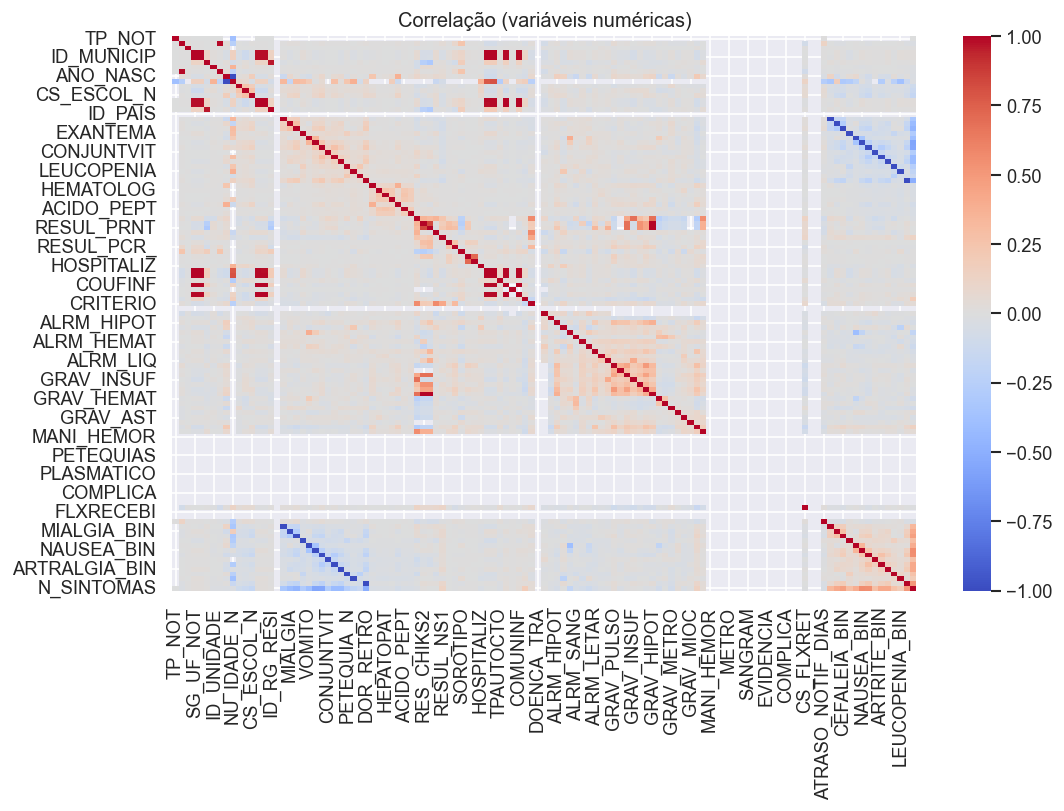

In [11]:
try:
    ax = plot_corr_heatmap(df_feat); save_fig(f"{FIGDIR}/corr_heatmap.png"); plt.show()
except ValueError as e:
    print(e)


In [1]:
# Casos por ano x UF
if {"NU_ANO","SG_UF_NOT"} <= set(df_feat.columns):
    tbl_ano_uf = pd.pivot_table(df_feat, index="NU_ANO", columns="SG_UF_NOT",
                                values="TP_NOT", aggfunc="count", fill_value=0)
    display(tbl_ano_uf.tail())
    tbl_ano_uf.to_csv(f"{TBLDIR}/casos_ano_uf.csv")

# Média de idade por UF
if {"NU_IDADE_N","SG_UF_NOT"} <= set(df_feat.columns):
    idade_uf = df_feat.groupby("SG_UF_NOT")["NU_IDADE_N"].mean().sort_values(ascending=False).to_frame("idade_media")
    display(idade_uf.head(10))
    idade_uf.to_csv(f"{TBLDIR}/idade_media_por_uf.csv")


NameError: name 'df_feat' is not defined